In [2]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/회피가능사망율(인구십만명당_의료지도).csv'
df = pd.read_csv(df)
df.head(3)

,Unnamed: 0,시도코드,시도명,십만명당 회피가능사망율
0,0,11,서울특별시,66.496942
1,1,21,부산광역시,86.370176
2,2,22,대구광역시,61.359540


In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [3]:
!sudo apt install -y fonts-nanum*  > /dev/null
!sudo fc-cache -fv                 > /dev/null
!rm ~/.cache/matplotlib -rf        > /dev/null

# 폰트 설정
mpl.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

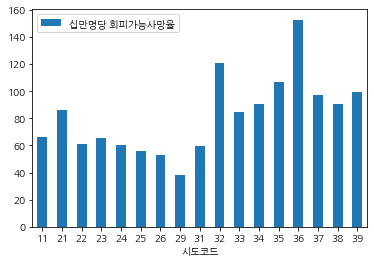

In [6]:
df.plot.bar(x='시도코드', y='십만명당 회피가능사망율', rot=0)

- KOSIS 자료로 시각화

In [7]:
df2 = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/회피가능사망율(KOSIS_2015).csv'
df2 = pd.read_csv(df2)
df2.head(3)

,Unnamed: 0,시도명,사망률
0,0,11,44.6
1,1,21,55.3
2,2,22,54.2


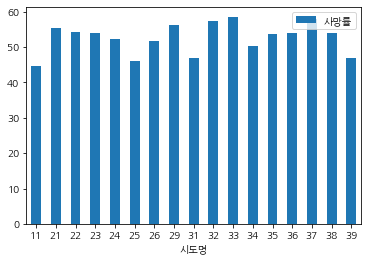

In [8]:
df2.plot.bar(x='시도명', y='사망률', rot=0)

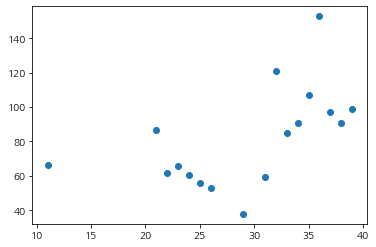

In [9]:
# 회피가능사망률 산점도
plt.scatter(df['시도코드'],df['십만명당 회피가능사망율'])
plt.show()

In [10]:
df3 = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/의료종사자수_통합.csv'
df3 = pd.read_csv(df3)
df3.head(3)

,Unnamed: 0,시도코드,계,의사,간호사,주민등록인구,인구 천명당 의사수,인구 천명당 간호사수,인구 천명당 의료인수
0,0,계,460995,105628,215293,51849861,2.037190,4.152239,8.890959
1,1,11,114861,30359,52727,9729107,3.120430,5.419511,11.805914
2,2,21,37028,8008,18514,3413841,2.345745,5.423217,10.846434


In [11]:
df3 = df3.drop([0])

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 1 to 17
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   17 non-null     int64  
 1   시도코드         17 non-null     object 
 2   계            17 non-null     int64  
 3   의사           17 non-null     int64  
 4   간호사          17 non-null     int64  
 5   주민등록인구       17 non-null     int64  
 6   인구 천명당 의사수   17 non-null     float64
 7   인구 천명당 간호사수  17 non-null     float64
 8   인구 천명당 의료인수  17 non-null     float64
dtypes: float64(3), int64(5), object(1)
memory usage: 1.3+ KB


In [13]:
df3 = df3.astype({'시도코드':'int'})
df3.dtypes

Unnamed: 0       int64
시도코드             int64
계                int64
의사               int64
간호사              int64
주민등록인구           int64
인구 천명당 의사수     float64
인구 천명당 간호사수    float64
인구 천명당 의료인수    float64
dtype: object

In [14]:
df4 = pd.merge(df, df3)
df4

,시도코드,시도명,십만명당 회피가능사망율,Unnamed: 0,계,의사,간호사,주민등록인구,인구 천명당 의사수,인구 천명당 간호사수,인구 천명당 의료인수
0,11,서울특별시,66.496942,1,114861,30359,52727,9729107,3.120430,5.419511,11.805914
1,21,부산광역시,86.370176,2,37028,8008,18514,3413841,2.345745,5.423217,10.846434
2,22,대구광역시,61.359540,3,26087,5908,12557,2438031,2.423267,5.150468,10.700028
3,23,인천광역시,65.645136,4,24081,5071,11639,2957026,1.714899,3.936049,8.143655
4,24,광주광역시,60.682137,5,17835,3658,8949,1456468,2.511555,6.144316,12.245377
5,25,대전광역시,55.576349,6,15746,3726,7153,1474870,2.526324,4.849919,10.676195
6,26,울산광역시,52.723985,7,8950,1754,4612,1148019,1.527849,4.017355,7.796038
7,29,세종특별자치시,37.854591,8,1109,302,220,340575,0.886736,0.645966,3.256258
8,31,경기도,59.492215,9,91723,21210,39694,13239666,1.602004,2.998112,6.927894
9,32,강원도,120.779382,10,12115,2719,6043,1541502,1.763864,3.920203,7.859218


In [15]:
df4 = df4.drop('Unnamed: 0', axis=1)

In [16]:
df5 = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/지역별병상수.csv'
df5 = pd.read_csv(df5)
df5.head(3)

,행정구역별,인구 천명당 의료기관병상수,총병상수,주민등록인구
0,전국,13.6,703468,51849861
1,서울특별시,9.1,88059,9729107
2,부산광역시,20.5,69862,3413841


In [17]:
df6 = pd.merge(df4, df5)
df6

,시도코드,시도명,십만명당 회피가능사망율,계,의사,간호사,주민등록인구,인구 천명당 의사수,인구 천명당 간호사수,인구 천명당 의료인수,행정구역별,인구 천명당 의료기관병상수,총병상수
0,11,서울특별시,66.496942,114861,30359,52727,9729107,3.120430,5.419511,11.805914,서울특별시,9.1,88059
1,21,부산광역시,86.370176,37028,8008,18514,3413841,2.345745,5.423217,10.846434,부산광역시,20.5,69862
2,22,대구광역시,61.359540,26087,5908,12557,2438031,2.423267,5.150468,10.700028,대구광역시,15.6,38132
3,23,인천광역시,65.645136,24081,5071,11639,2957026,1.714899,3.936049,8.143655,인천광역시,11.6,34176
4,24,광주광역시,60.682137,17835,3658,8949,1456468,2.511555,6.144316,12.245377,광주광역시,27.6,40206
5,25,대전광역시,55.576349,15746,3726,7153,1474870,2.526324,4.849919,10.676195,대전광역시,15.9,23417
6,26,울산광역시,52.723985,8950,1754,4612,1148019,1.527849,4.017355,7.796038,울산광역시,13.3,15284
7,29,세종특별자치시,37.854591,1109,302,220,340575,0.886736,0.645966,3.256258,세종특별자치시,4.2,1440
8,31,경기도,59.492215,91723,21210,39694,13239666,1.602004,2.998112,6.927894,경기도,10.1,133118
9,32,강원도,120.779382,12115,2719,6043,1541502,1.763864,3.920203,7.859218,강원도,11.3,17372


In [18]:
df6.rename(columns={'계':'의료인수합계'},inplace=True)
df6

,시도코드,시도명,십만명당 회피가능사망율,의료인수합계,의사,간호사,주민등록인구,인구 천명당 의사수,인구 천명당 간호사수,인구 천명당 의료인수,행정구역별,인구 천명당 의료기관병상수,총병상수
0,11,서울특별시,66.496942,114861,30359,52727,9729107,3.120430,5.419511,11.805914,서울특별시,9.1,88059
1,21,부산광역시,86.370176,37028,8008,18514,3413841,2.345745,5.423217,10.846434,부산광역시,20.5,69862
2,22,대구광역시,61.359540,26087,5908,12557,2438031,2.423267,5.150468,10.700028,대구광역시,15.6,38132
3,23,인천광역시,65.645136,24081,5071,11639,2957026,1.714899,3.936049,8.143655,인천광역시,11.6,34176
4,24,광주광역시,60.682137,17835,3658,8949,1456468,2.511555,6.144316,12.245377,광주광역시,27.6,40206
5,25,대전광역시,55.576349,15746,3726,7153,1474870,2.526324,4.849919,10.676195,대전광역시,15.9,23417
6,26,울산광역시,52.723985,8950,1754,4612,1148019,1.527849,4.017355,7.796038,울산광역시,13.3,15284
7,29,세종특별자치시,37.854591,1109,302,220,340575,0.886736,0.645966,3.256258,세종특별자치시,4.2,1440
8,31,경기도,59.492215,91723,21210,39694,13239666,1.602004,2.998112,6.927894,경기도,10.1,133118
9,32,강원도,120.779382,12115,2719,6043,1541502,1.763864,3.920203,7.859218,강원도,11.3,17372


In [27]:
df7 = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/요양기관수.csv'
df7 = pd.read_csv(df7)
df7.head(3)

,Unnamed: 0,시도코드,상급종합병원,종합병원,병원,의원,요양기관총합
0,0,11,13,44,228,8628,8924
1,1,21,4,25,142,2384,2576
2,2,23,3,16,62,1573,1677


In [28]:
df7 = df7.drop('Unnamed: 0', axis=1)
df8 = pd.merge(df6, df7)
df8

,시도코드,시도명,십만명당 회피가능사망율,의료인수합계,의사,간호사,주민등록인구,인구 천명당 의사수,인구 천명당 간호사수,인구 천명당 의료인수,행정구역별,인구 천명당 의료기관병상수,총병상수,상급종합병원,종합병원,병원,의원,요양기관총합
0,11,서울특별시,66.496942,114861,30359,52727,9729107,3.120430,5.419511,11.805914,서울특별시,9.1,88059,13,44,228,8628,8924
1,21,부산광역시,86.370176,37028,8008,18514,3413841,2.345745,5.423217,10.846434,부산광역시,20.5,69862,4,25,142,2384,2576
2,22,대구광역시,61.359540,26087,5908,12557,2438031,2.423267,5.150468,10.700028,대구광역시,15.6,38132,5,11,109,1803,1950
3,23,인천광역시,65.645136,24081,5071,11639,2957026,1.714899,3.936049,8.143655,인천광역시,11.6,34176,3,16,62,1573,1677
4,24,광주광역시,60.682137,17835,3658,8949,1456468,2.511555,6.144316,12.245377,광주광역시,27.6,40206,2,21,80,948,1075
5,25,대전광역시,55.576349,15746,3726,7153,1474870,2.526324,4.849919,10.676195,대전광역시,15.9,23417,1,9,51,1078,1164
6,26,울산광역시,52.723985,8950,1754,4612,1148019,1.527849,4.017355,7.796038,울산광역시,13.3,15284,0,8,43,609,686
7,29,세종특별자치시,37.854591,1109,302,220,340575,0.886736,0.645966,3.256258,세종특별자치시,4.2,1440,0,1,0,181,211
8,31,경기도,59.492215,91723,21210,39694,13239666,1.602004,2.998112,6.927894,경기도,10.1,133118,5,59,277,7065,7437
9,32,강원도,120.779382,12115,2719,6043,1541502,1.763864,3.920203,7.859218,강원도,11.3,17372,1,14,45,769,861


In [29]:
df8 = df8.drop('행정구역별', axis=1)

In [30]:
pop = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/2019총인구.csv'
pop = pd.read_csv(pop)
pop.head(3)

,Unnamed: 0,시도코드,총 인구수(명),총인구_남자(명),총인구_여자(명),총인구_성비(명)
0,1,11,9639541,4690440,4949101,94.8
1,29,21,3372692,1655566,1717126,96.4
2,57,22,2429940,1203754,1226186,98.2


In [37]:
df9 = pd.merge(df8, pop, on='시도코드')
df9.head(3)

,시도코드,시도명,십만명당 회피가능사망율,의료인수합계,의사,간호사,주민등록인구,인구 천명당 의사수,인구 천명당 간호사수,인구 천명당 의료인수,인구 천명당 의료기관병상수,총병상수,상급종합병원,종합병원,병원,의원,요양기관총합,Unnamed: 0,총 인구수(명),총인구_남자(명),총인구_여자(명),총인구_성비(명)
0,11,서울특별시,66.496942,114861,30359,52727,9729107,3.120430,5.419511,11.805914,9.1,88059,13,44,228,8628,8924,1,9639541,4690440,4949101,94.8
1,21,부산광역시,86.370176,37028,8008,18514,3413841,2.345745,5.423217,10.846434,20.5,69862,4,25,142,2384,2576,29,3372692,1655566,1717126,96.4
2,22,대구광역시,61.359540,26087,5908,12557,2438031,2.423267,5.150468,10.700028,15.6,38132,5,11,109,1803,1950,57,2429940,1203754,1226186,98.2


In [38]:
df9['천명당 요양기관 수'] = df9['요양기관총합'] / df9['주민등록인구'] * 1000
df9['천명당 상급+종합병원수'] = (df9['상급종합병원'] + df9['종합병원']) / df9['주민등록인구'] * 1000
df9.head(3)

,시도코드,시도명,십만명당 회피가능사망율,의료인수합계,의사,간호사,주민등록인구,인구 천명당 의사수,인구 천명당 간호사수,인구 천명당 의료인수,인구 천명당 의료기관병상수,총병상수,상급종합병원,종합병원,병원,의원,요양기관총합,Unnamed: 0,총 인구수(명),총인구_남자(명),총인구_여자(명),총인구_성비(명),천명당 요양기관 수,천명당 상급+종합병원수
0,11,서울특별시,66.496942,114861,30359,52727,9729107,3.120430,5.419511,11.805914,9.1,88059,13,44,228,8628,8924,1,9639541,4690440,4949101,94.8,0.917248,0.005859
1,21,부산광역시,86.370176,37028,8008,18514,3413841,2.345745,5.423217,10.846434,20.5,69862,4,25,142,2384,2576,29,3372692,1655566,1717126,96.4,0.754575,0.008495
2,22,대구광역시,61.359540,26087,5908,12557,2438031,2.423267,5.150468,10.700028,15.6,38132,5,11,109,1803,1950,57,2429940,1203754,1226186,98.2,0.799826,0.006563


In [39]:
df9.columns

Index(['시도코드', '시도명', '십만명당 회피가능사망율', '의료인수합계', '의사', '간호사', '주민등록인구',
       '인구 천명당 의사수', '인구 천명당 간호사수', '인구 천명당 의료인수', '인구 천명당 의료기관병상수', '총병상수',
       '상급종합병원', '종합병원', '병원', '의원', '요양기관총합', 'Unnamed: 0', '총 인구수(명)',
       '총인구_남자(명)', '총인구_여자(명)', '총인구_성비(명)', '천명당 요양기관 수', '천명당 상급+종합병원수'],
      dtype='object')

In [40]:
df9 =  df9[['시도코드', '시도명', '십만명당 회피가능사망율', '총 인구수(명)', '주민등록인구', 
            '의료인수합계', '의사', '간호사', '인구 천명당 의료인수', '인구 천명당 의사수', '인구 천명당 간호사수',
            '총병상수', '인구 천명당 의료기관병상수',
            '요양기관총합', '상급종합병원', '종합병원', '병원', '의원', '천명당 요양기관 수', '천명당 상급+종합병원수']]
df9.head()

,시도코드,시도명,십만명당 회피가능사망율,총 인구수(명),주민등록인구,의료인수합계,의사,간호사,인구 천명당 의료인수,인구 천명당 의사수,인구 천명당 간호사수,총병상수,인구 천명당 의료기관병상수,요양기관총합,상급종합병원,종합병원,병원,의원,천명당 요양기관 수,천명당 상급+종합병원수
0,11,서울특별시,66.496942,9639541,9729107,114861,30359,52727,11.805914,3.120430,5.419511,88059,9.1,8924,13,44,228,8628,0.917248,0.005859
1,21,부산광역시,86.370176,3372692,3413841,37028,8008,18514,10.846434,2.345745,5.423217,69862,20.5,2576,4,25,142,2384,0.754575,0.008495
2,22,대구광역시,61.359540,2429940,2438031,26087,5908,12557,10.700028,2.423267,5.150468,38132,15.6,1950,5,11,109,1803,0.799826,0.006563
3,23,인천광역시,65.645136,2952237,2957026,24081,5071,11639,8.143655,1.714899,3.936049,34176,11.6,1677,3,16,62,1573,0.567124,0.006425
4,24,광주광역시,60.682137,1489730,1456468,17835,3658,8949,12.245377,2.511555,6.144316,40206,27.6,1075,2,21,80,948,0.738087,0.015792


In [41]:
df9.rename(columns={'총 인구수(명)':'총 인구'},inplace=True)
df9.rename(columns={'인구 천명당 의료인수':'천명당 의료인수'},inplace=True)
df9.rename(columns={'인구 천명당 의사수':'천명당 의사수'},inplace=True)
df9.rename(columns={'인구 천명당 간호사수':'천명당 간호사수'},inplace=True)
df9.rename(columns={'총병상수':'병상수합계'},inplace=True)
df9.rename(columns={'인구 천명당 의료기관병상수':'천명당 병상수'},inplace=True)
df9.rename(columns={'요양기관총합':'요양기관합계'},inplace=True)
df9.rename(columns={'천명당 요양기관 수':'천명당 요양기관수'},inplace=True)
df9.head(3)


,시도코드,시도명,십만명당 회피가능사망율,총 인구,주민등록인구,의료인수합계,의사,간호사,천명당 의료인수,천명당 의사수,천명당 간호사수,병상수합계,천명당 병상수,요양기관합계,상급종합병원,종합병원,병원,의원,천명당 요양기관수,천명당 상급+종합병원수
0,11,서울특별시,66.496942,9639541,9729107,114861,30359,52727,11.805914,3.120430,5.419511,88059,9.1,8924,13,44,228,8628,0.917248,0.005859
1,21,부산광역시,86.370176,3372692,3413841,37028,8008,18514,10.846434,2.345745,5.423217,69862,20.5,2576,4,25,142,2384,0.754575,0.008495
2,22,대구광역시,61.359540,2429940,2438031,26087,5908,12557,10.700028,2.423267,5.150468,38132,15.6,1950,5,11,109,1803,0.799826,0.006563


In [42]:
df9.to_csv('인구대비데이터정리.csv')